In [1]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)
from sklearn.linear_model import LinearRegression

In [2]:
not_sheared = sa.load_csv("data/50uW_not_sheared.csv")
sheared = sa.load_csv("data/50uW_sheared.csv")
sa.compare_plots([not_sheared,sheared], title = "Biggest shear I measured")
sheared.wl_to_freq()
sheared.constant_spacing()
sa.plot(sheared)

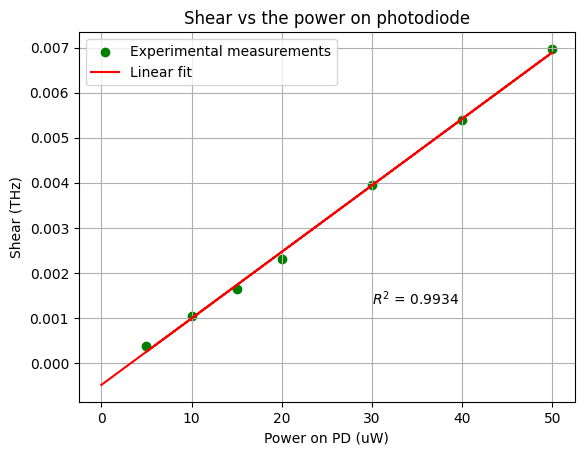

In [ ]:
powers = np.array([5, 10, 15, 20, 30, 40, 50])
shears = []

for power in powers:
    shears.append(sa.find_shear("data/{}uW_sheared.csv".format(power), "data/{}uW_not_sheared.csv".format(power), show_plot = False, how = "fit", improve_resolution = 20))

linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(powers.copy().reshape(-1, 1), np.abs(shears).copy().reshape(-1, 1))
shears_predict = linear_model.predict(np.append(powers.copy(), 0).reshape(-1, 1))
r_2 = linear_model.score(np.append(powers.copy(), 0).reshape(-1, 1), np.append(np.abs(shears).copy(), 0).reshape(-1, 1))

plt.scatter(powers, np.abs(shears), color = "green")
plt.plot(np.append(powers.copy(), 0), shears_predict, color = "red")
plt.grid()
plt.xlabel("Power on PD (uW)")
plt.ylabel("Shear (THz)")
plt.legend(["Experimental measurements", "Linear fit"])
plt.title("Shear vs the power on photodiode")
plt.text(s = r"$R^2$ = {}".format(round(r_2, 4)), x = 30, y = 0.0013)
plt.show()

Starting SPIDER calculations.

Shear of 0.003941768933373532 THz


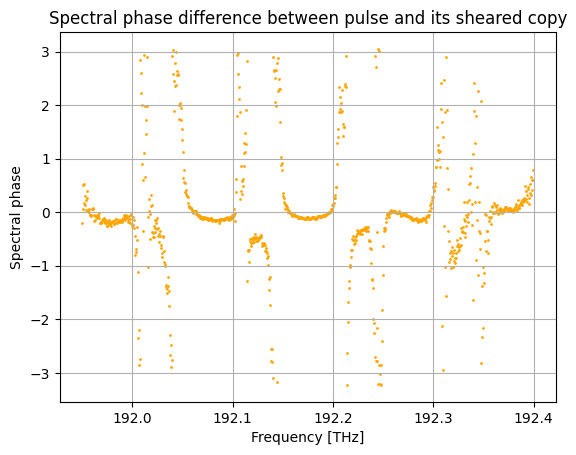

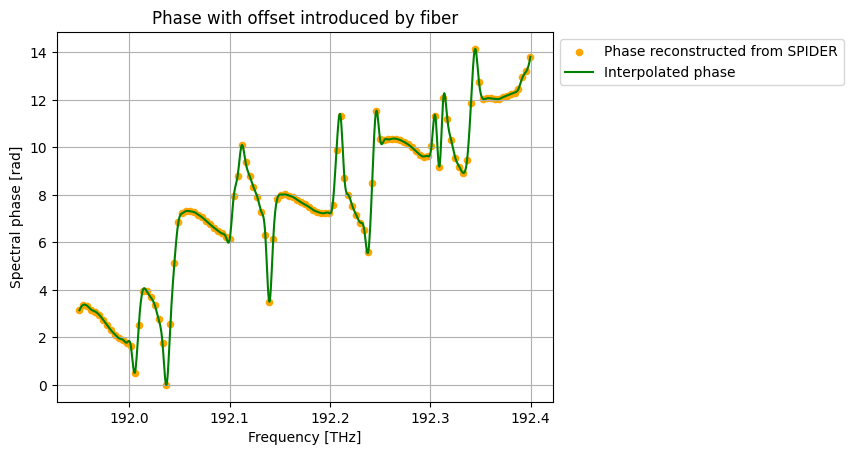

5/7

Yaaay! Everything seems fine!



In [ ]:
print("Starting SPIDER calculations.\n")
for num, power in enumerate(powers):
    if num != 4: continue
    print("Shear of {} THz".format(shears[num]))
    sa.spider(temporal_spectrum = "data/{}uW_t_spectrum.csv".format(power),
        phase_spectrum = "data/{}uW_p_spectrum.csv".format(power),
        intensity_spectrum = "data/{}uW_not_sheared.csv".format(power),
        shear = np.abs(shears[num]),
        plot_phase_inter = True,
        plot_steps = False,
        plot_phase = False,
        plot_pulse = False,
        fiber_length = 44,
        phase_borders = [191.95, 192.4],
        improve_resolution = 10,
        forced_delay = 60)
    print("{}/{}".format(num+1, len(powers)))

print("\nYaaay! Everything seems fine!\n")

9998


d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


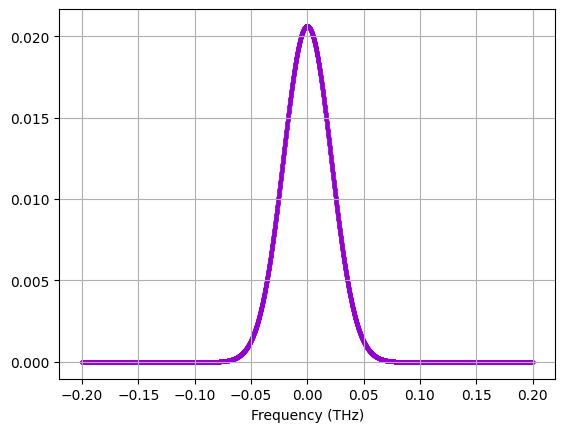

In [ ]:
pulse = sa.hermitian_pulse(0, [192, 192.4], 192.2, 0.05, num = 1000)
pulse.increase_resolution(times = 10)
print(len(pulse))
s = 0
e = -1

plt.scatter(pulse.X[s:e], pulse.Y[s:e], color = "darkviolet", s = 3)
plt.grid()
plt.xlabel("Frequency (THz)")
plt.show()